In [1]:
#ignore this (used google colab so have to read data from google drive)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#ignore this (used google colab so have to read data from google drive)
cd gdrive

/content/gdrive


In [3]:
#ignore this (used google colab so have to read data from google drive)
cd My\ Drive

/content/gdrive/My Drive


In [4]:
#ignore this (used google colab so have to read data from google drive)
cd data

/content/gdrive/My Drive/data


In [63]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from time import time
def oneDigitY(y):
    """
    

    Parameters
    ----------
    y : np.array
    of 2d array shape(n,m)

    Returns
    -------
    1d array (n,)

    """
    n = y.shape[0] 
    print(n)
    newY = np.zeros(n,dtype=int)
    for i in range(n):
        num = np.where(y[i]==1)
        num = num[0][0]
        newY[i] = num
    return newY
    
def describeData(X):
    """
    

    Parameters
    ----------
    X : np.array

    Returns
    -------
    None.

    """
    X = pd.DataFrame(X)
    print(X[1:4])
    return X.describe()

def classFreqPlot(y):
    """
    Parameters
    ----------
    y : np.array
    of shape (n,)

    Returns
    -------
    None.

    """
    y = pd.DataFrame(y)
    
    classFreq = y[0].value_counts()
    print(classFreq)
    classFreq.plot.barh()
    plt.show()
    
def displayNHandWrittenDigit(n,X,y):
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 4
    # print("shape of y",y.shape)
    for i in range(1, columns*rows +1):
        rndI = random.randint(1,4100)
        image28x28 = np.reshape(X[rndI],(28,28))
        fig.add_subplot(rows, columns, i)
        plt.imshow(image28x28, cmap="gray")
        # num = np.where(y[rndI]==1)
        # print(num)
        # print(num[0][0])
        num = y[rndI]
        plt.title("Number = {}".format(num))
    fig.tight_layout()
    plt.show()

def pre_process(dataset):
    """
    Reading the file and preprocessing the input and output.
    Note that you will encode any string value and/or remove empty entries in this function only.
    Further any pre processing steps have to be performed in this function too. 

    Parameters
    ----------

    dataset : integer with acceptable values 0, 1, or 2
    0 -> Dataset A
    1 -> Dataset B
    2 -> Dataset C
    
    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features)
    y : 2-dimensional numpy array of shape (n_samples,)
    """

    # reading data file
    
    
    # np.empty creates an empty array only. You have to replace this with your code.
    X = np.empty((0,0))
    y = np.empty((0))

    if dataset == 0:
        df = pd.read_csv ('train.csv')

        df.dropna(inplace=True)
        #shuffling both x and y 
        df = df.sample(frac=1,  random_state = 0).reset_index(drop=True)
        # spliting back to x and y
        
        #first column is label
        dataAY = df.iloc[1:,0]
        
        #rest are features
        dataAX = df.iloc[1:,1:]
        print(dataAX)
        print(dataAY)
        X = np.array(dataAX)
        y = np.array(dataAY)
    
        # #Using Pearson Correlation
        # plt.figure(figsize=(12,10))
        # cor = df.corr()
        # sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
        # plt.show()
    elif(dataset == 1):
        df = pd.read_csv ('emnist-digits-train.csv')

        df.dropna(inplace=True)
        #shuffling both x and y 
        df = df.sample(frac=1,  random_state = 0).reset_index(drop=True)
        # spliting back to x and y
        
        #first column is label
        dataAY = df.iloc[1:,0]
        
        #rest are features
        dataAX = df.iloc[1:,1:]
        print(dataAX)
        print(dataAY)
        X = np.array(dataAX)
        y = np.array(dataAY)
  

        
    return X, y

        0  0.1  0.2  0.3  0.4  0.5  ...  0.515  0.516  0.517  0.518  0.519  0.520
1       0    0    0    0    0    0  ...      0      0      0      0      0      0
2       0    0    0    0    0    0  ...      0      0      0      0      0      0
3       0    0    0    0    0    0  ...      0      0      0      0      0      0
4       0    0    0    0    0    0  ...      0      0      0      0      0      0
5       0    0    0    0    0    0  ...      0      0      0      0      0      0
...    ..  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
239994  0    0    0    0    0    0  ...      0      0      0      0      0      0
239995  0    0    0    0    0    0  ...      0      0      0      0      0      0
239996  0    0    0    0    0    0  ...      0      0      0      0      0      0
239997  0    0    0    0    0    0  ...      0      0      0      0      0      0
239998  0    0    0    0    0    0  ...      0      0      0      0      0      0

[239998 rows x 

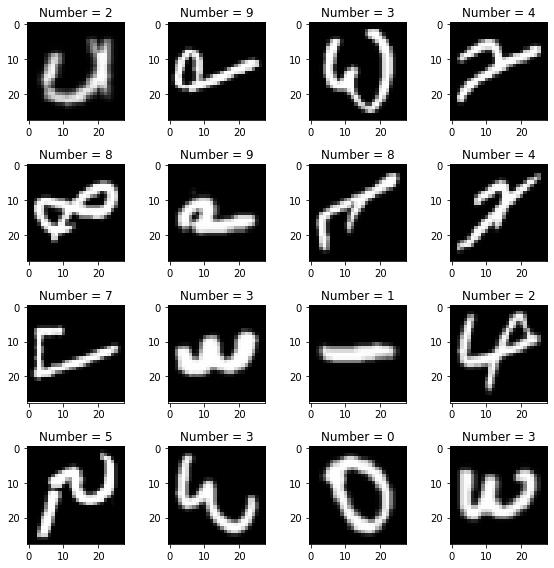

class freq for y after stratified sampling
7    24000
6    24000
5    24000
4    24000
3    24000
2    24000
1    24000
0    24000
9    23999
8    23999
Name: 0, dtype: int64


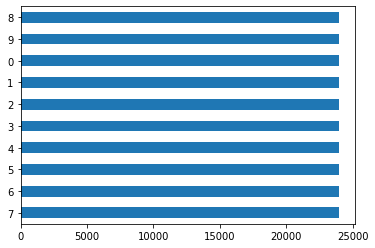

initial features: 784


In [64]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
X,y=pre_process(1)                                    ################### just change the dataset from here 
######################################################################### use 0 for mnist and 1 for emnist
print(X.shape)
print(y.shape)
displayNHandWrittenDigit(20,X,y)

#Each pixel value frequency
# descTable = describeData(X)
# print(descTable)


print("class freq for y after stratified sampling")
classFreqPlot(y)

print("initial features:",len(X[0]))

# #dropping the column with all 0's as it won't help our model
# df = pd.DataFrame(X)
# df = df.loc[:, (df != 0).any(axis=0)]
# X = df.iloc[:, :]
# X = np.array(X)

# print("features after deleting column with all 0:",len(X[0]))

# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# pre processing applying scaling for tsne so that we get a good plot
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
############ always run ends ##################################


Features after PCA: 50
class freq for ytrain after stratified sampling
7    19200
6    19200
5    19200
4    19200
3    19200
2    19200
1    19200
0    19200
9    19199
8    19199
Name: 0, dtype: int64


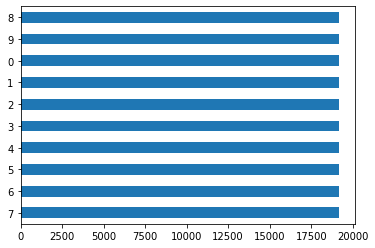

class freq for ytest after stratified sampling
9    4800
8    4800
7    4800
6    4800
5    4800
4    4800
3    4800
2    4800
1    4800
0    4800
Name: 0, dtype: int64


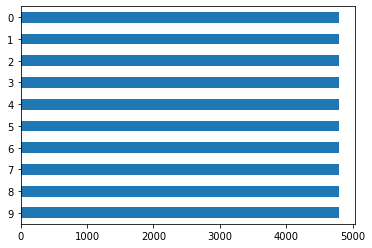

In [49]:

###################### PCA  do X = (X - mean(X)) / std(X).  ###############
from sklearn.decomposition import PCA
pca=PCA(50) # else some column will have std as 0 and due to which divide by 0 error
#so it may give SVD did not converge

pcaX=pca.fit_transform(X)
print("Features after PCA:",len(pcaX[0]))

# #Using Pearson Correlation (after PCA to analyze the correlation between data)
# plt.figure(figsize=(32,30))
# df = pd.DataFrame(pcaX)
# cor = df.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

##################### split ################
X_train, X_test, y_train, y_test = train_test_split(pcaX, y,stratify=y,test_size=0.20,random_state = 1)

print("class freq for ytrain after stratified sampling")
classFreqPlot(y_train)

print("class freq for ytest after stratified sampling")
classFreqPlot(y_test)
##################### split end ################


Features after SVD: 50
class freq for ytrain after stratified sampling
7    19200
6    19200
5    19200
4    19200
3    19200
2    19200
1    19200
0    19200
9    19199
8    19199
Name: 0, dtype: int64


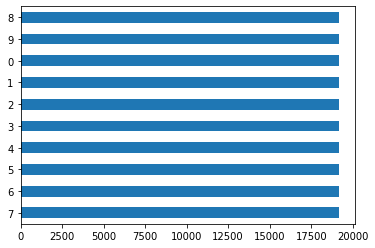

class freq for ytest after stratified sampling
9    4800
8    4800
7    4800
6    4800
5    4800
4    4800
3    4800
2    4800
1    4800
0    4800
Name: 0, dtype: int64


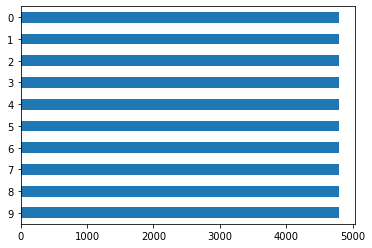

In [61]:
################# SVD ################## (can be ignored, pca is enough)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(50)
#fit and transform on X
svdX = svd.fit_transform(X)
print("Features after SVD:",len(svdX[0]))

X_train, X_test, y_train, y_test = train_test_split(svdX, y,stratify=y,test_size=0.20,random_state = 1)

print("class freq for ytrain after stratified sampling")
classFreqPlot(y_train)
print("class freq for ytest after stratified sampling")
classFreqPlot(y_test)


(3360, 3)
[-1.35253465 -4.95368099  8.        ]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


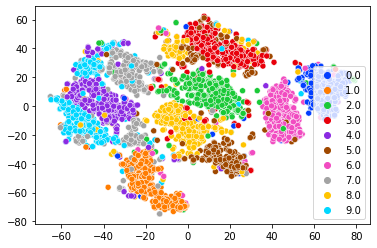

In [37]:
##TSNE for visualization
from sklearn.manifold import TSNE
tX_train = TSNE(n_components=2).fit_transform(X_train[:3360]) #taking only first 3360 data for visualization


#adding the label
matYtrain = np.mat(y_train[:3360]).transpose()
XY_train = np.array(np.hstack((tX_train, matYtrain)),dtype = float)
print(XY_train.shape)
print(XY_train[2])
import seaborn as sns
sns.scatterplot(XY_train[:,0],XY_train[:,1],hue=XY_train[:,2], palette="bright")

In [38]:
start = time()
####################### now using GNB ################################# (bad with 50d)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
#training on X_train
classifier.fit(X_train, y_train)    
# Predict on X_test
y_pred = classifier.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(time() - start)

Testing accuracy: 0.7514791666666667
0.31192517280578613


In [39]:
start = time()
#######################  grid search on D.T #################################
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_param = {
    'max_depth': [3, 6, 9, 11,13, 15, 21],
    'criterion': ['gini']
    }
gdsrcv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_param, scoring='accuracy', n_jobs=-1)
gdsrcv.fit(X_train, y_train)
best_parameters = gdsrcv.best_params_
print(best_parameters)
print(time() - start)

{'criterion': 'gini', 'max_depth': 21}
332.55031275749207


In [40]:
start = time()
#bad with 50D
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 21, criterion = 'gini', random_state = 1,class_weight='balanced')
classifier.fit(X_train, y_train)        
# Predict on X_test
y_pred = classifier.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(time() - start)

Testing accuracy: 0.8671458333333333
25.14717674255371


In [41]:
start = time()
#good with 50D
#fitting and predicting using logistic on train and test data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(time() - start)

Testing accuracy: 0.9273541666666667
117.11257576942444


In [ ]:
######################### Random forest after Gridsearch ##########################3
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid_param = {
    'n_estimators': [10, 50, 100, 300, 700],
    'max_depth': [3, 6, 9, 11,13, 15, 21],
    'criterion': ['gini'],
    'bootstrap': [True]
}

gdsrcv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gdsrcv.fit(X_train, y_train)
best_parameters = gdsrcv.best_params_
print(best_parameters)

In [42]:
start = time()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 15,bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 0,n_jobs = -1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
#30D - 92, 50D - 93.9
print(time() - start)

Testing accuracy: 0.9537916666666667
1237.2547307014465


In [43]:
start = time()
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
#30D - 97, 50D - 97.3
print(time() - start)

Testing accuracy: 0.9738333333333333
561.5915329456329


In [44]:
start = time()
#SVC classifier
from sklearn.svm import SVC
classifier = SVC(probability=True,random_state=1)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
#30D - 0.96 , 50D - 96.6
print(time() - start)

#you can stop it early after around 7 mins (you'll get almost same accuracy)

Testing accuracy: 0.9835208333333333
1744.4068450927734


In [62]:
from time import time
start = time()
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(200, ), random_state=1 ,max_iter=2000, learning_rate_init=0.01,warm_start=True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
# print(X_train.shape)
y_pred = classifier.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
#30D - 0.972, 50D - 97.262
print(time() - start)
#stopped it early other wise it'll take more than printed time to run for all the iterations and will also give better accuracy

Testing accuracy: 0.976
94.03480052947998


In [65]:
##run this part after reading the data (dont run pca and svd before this)
from time import time
start = time()
############ also using keras #######3
import keras
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
from keras.datasets import mnist
from keras.utils import np_utils
#load mnist dataset

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state = 1)
##################### split end ################
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
#set number of categories
num_category = 10
print(np.unique(y_train, return_counts=True))
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

##model building for assignment only
model = Sequential()

# #flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(600, activation='tanh'))
model.add(Dense(500, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(300, activation='tanh'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
#output activation softmax
model.add(Dense(num_category, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

batch_size = 100
num_epoch = 50
#model training
model_log = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test), workers = 6)
print(time()-start)

##### if we increase the number of hidden layers then our models get complex and hence we get more accuracy so here we have taken 8 hidden units and batch size is 50
# and for epochs = 50, we can see that it's not completely converged and we are getting accuracy of around 84% which can be further increased by increasing the number of epochs, and hidden layer and by decresing the batch size.
# to further increase the accuracy we can do the data augmentation of training data by using random fliping, rotation and cropping.

X_train shape (191998, 784)
y_train shape (191998,)
X_test shape (48000, 784)
y_test shape (48000,)
X_train shape (191998, 28, 28, 1)
y_train shape (191998,)
X_test shape (48000, 28, 28, 1)
y_test shape (48000,)
X_train shape: (191998, 28, 28, 1)
191998 train samples
48000 test samples
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([19200, 19200, 19200, 19200, 19200, 19200, 19200, 19200, 19199,
       19199]))
Epoch 1/50
1920/1920 [==============================] - 8s 4ms/step - loss: 2.2988 - accuracy: 0.1611 - val_loss: 2.2948 - val_accuracy: 0.2571
Epoch 2/50
1920/1920 [==============================] - 7s 4ms/step - loss: 2.2934 - accuracy: 0.2747 - val_loss: 2.2887 - val_accuracy: 0.3196
Epoch 3/50
1920/1920 [==============================] - 7s 4ms/step - loss: 2.2871 - accuracy: 0.3245 - val_loss: 2.2812 - val_accuracy: 0.3660
Epoch 4/50
1920/1920 [==============================] - 7s 4ms/step - loss: 2.2790 - accuracy: 0.3666 - val_loss: 2.2706 - val_accuracy: 0.3665
Epoch 5/50
